<a href="https://colab.research.google.com/github/ccastano1997/BreastCancer_RNAseq_Clustering/blob/main/GSE113863.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading Files, and converting to DataFrame**

In [1]:
import pandas as pd

# Load the normalized gene expression data
df = pd.read_csv("GSE113863_dwd_normalized_std_expression.csv.gz", compression='gzip', index_col=0)

# Print the first few rows of the DataFrame
print(df.head())

               CD27   CCR2  SH2D1A  PRKCB  PTPRC  CORO1A  IL2RG   CD52   GZMK  \
CLID                                                                            
SH_TS_BC_C1  -0.114 -1.519  -0.646 -1.541 -0.695  -0.332 -0.031 -0.124 -0.451   
SH_TS_BC_C11  1.280 -3.564   1.042 -1.151  0.203   0.954  1.276  1.283  1.219   
SH_TS_BC_C15  1.476 -3.405   1.046 -1.521  0.171   0.801  1.243  1.253  1.214   
SH_TS_BC_C3   0.315  0.735   0.215  0.702 -0.447   0.613  0.841  0.975  0.300   
SH_TS_BC01   -1.100 -0.010  -0.266  0.375 -0.022   0.813 -0.055  0.545  0.797   

               GZMA  ...   CDH3   EGFR  PHGDH  ACTR3B  MRPL19  GAPDH   GUSB  \
CLID                 ...                                                      
SH_TS_BC_C1  -0.002  ... -1.291  0.371  1.180  -0.474  -0.014  0.455  0.473   
SH_TS_BC_C11  1.472  ...  1.478  0.531  0.516  -0.990  -0.791  0.310  0.400   
SH_TS_BC_C15  1.548  ...  1.489  0.500  0.456  -0.883  -0.767  0.235  0.433   
SH_TS_BC_C3   0.513  ... -0.702 -1.00

In [2]:
print(df.index)

Index(['SH_TS_BC_C1', 'SH_TS_BC_C11', 'SH_TS_BC_C15', 'SH_TS_BC_C3',
       'SH_TS_BC01', 'SH_TS_BC010_1', 'SH_TS_BC010_2', 'SH_TS_BC02',
       'SH_TS_BC04', 'SH_TS_BC05',
       ...
       'UNC_TGS_BC_96', 'UNC_TGS_BC_97', 'UNC_TGS_BC_99', 'UNC_TGS_BC_9m',
       'UNC_TGS_BC_Y23', 'UNC_TGS_BC_Y23_R1', 'UNC_TGS_BC_Y90',
       'UNC_TGS_BC_Y90_R1', 'UNC_TGS_BC_76', 'UNC_TGS_BC_76_R1'],
      dtype='object', name='CLID', length=483)


# **Finding best K using Elbow Plot**

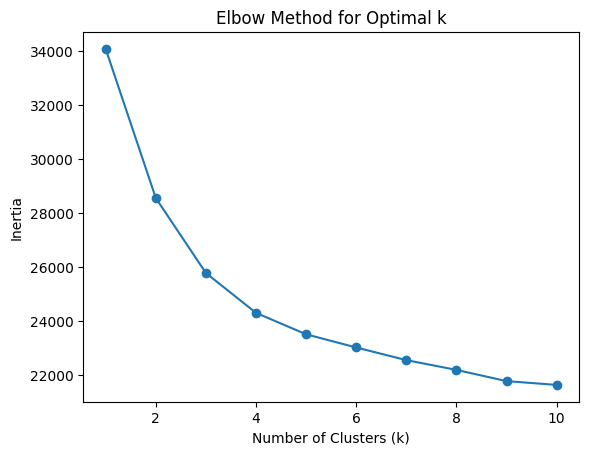

                   cluster
CLID                      
SH_TS_BC_C1              2
SH_TS_BC_C11             2
SH_TS_BC_C15             2
SH_TS_BC_C3              2
SH_TS_BC01               0
...                    ...
UNC_TGS_BC_Y23_R1        1
UNC_TGS_BC_Y90           2
UNC_TGS_BC_Y90_R1        2
UNC_TGS_BC_76            0
UNC_TGS_BC_76_R1         0

[483 rows x 1 columns]


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# No need to transpose since samples are already rows
X = df.copy()

# Determine the optimal number of clusters (k) using the elbow method
inertia = []
for i in range(1, 11):  # Try k values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal k based on the elbow plot (let's say it's 3)
optimal_k = 3  # Replace with the value you choose from the plot

# Perform K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Get the cluster labels for each sample
cluster_labels = kmeans.labels_

# Add the cluster labels to your DataFrame
df['cluster'] = cluster_labels

# Print the cluster assignments for each sample
print(df[['cluster']])  # Print only the cluster assignments

# **Silhouette Analysis**

For n_clusters = 2, the average silhouette_score is : 0.15056914360419807


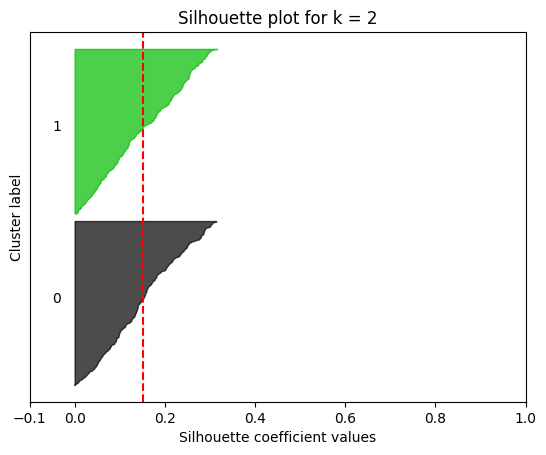

For n_clusters = 3, the average silhouette_score is : 0.14934197049096218


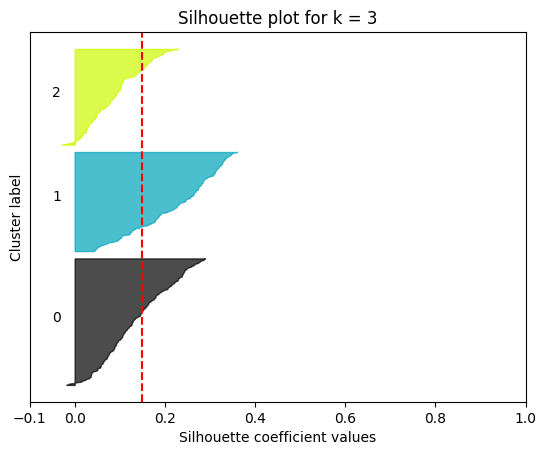

For n_clusters = 4, the average silhouette_score is : 0.12715165703891168


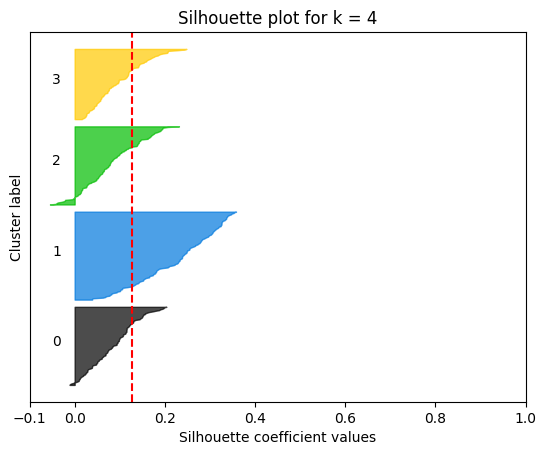

For n_clusters = 5, the average silhouette_score is : 0.11873391485342237


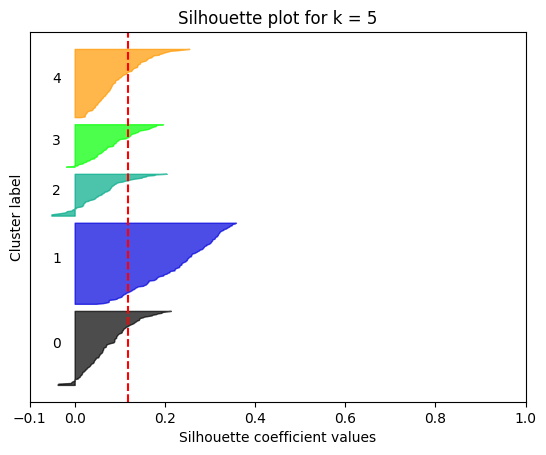

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# ... (your code to load the data) ...

X = df.copy()  # No need to reset the index

# Try different values of k
for k in range(2, 6):  # Try k from 2 to 5
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the average silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")


    # Calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Create a silhouette plot
    fig, ax1 = plt.subplots(1, 1)
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"Silhouette plot for k = {k}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# **Observations of Silhouette Analysis**

Silhouette analysis was used to evaluate the quality of the clustering results for different values of k. This method measures how similar each sample is to its own cluster compared to other clusters, with silhouette coefficients ranging from -1 to +1. A higher average silhouette score generally indicates better-defined and separated clusters.

**Observations**:

* Overall: The silhouette plots for k=2, k=3, and k=4 show that the clusters are not very well-separated, with significant overlap between them. This suggests that the samples might not be easily grouped into distinct clusters, possibly due to the inherent heterogeneity of the data.

* k=2: The plot for k=2 shows two clusters with uneven sizes. Cluster 0 is larger and has a wider range of silhouette coefficients, including some negative values, indicating potential misclassification. Cluster 1 is smaller and more compact but still has a relatively low average silhouette score (0.156).

* k=3: Increasing to three clusters results in more evenly sized clusters, but the average silhouette score slightly decreases to 0.149. However, the overall distribution of silhouette coefficients seems slightly improved, with fewer negative values.

* k=4:  With four clusters, the cluster sizes become less balanced again, and the average silhouette score further decreases to 0.127. The plot shows a wide range of silhouette coefficients in most clusters, indicating significant overlap.

These observations, along with the low silhouette scores, suggest that the clustering structure is not very strong for any of the k values examined. While k=2 and k=3 show slightly better results than k=4, the overall low silhouette scores indicate that further exploration of k values or alternative clustering methods might be needed."

# **PCA for Visualization**

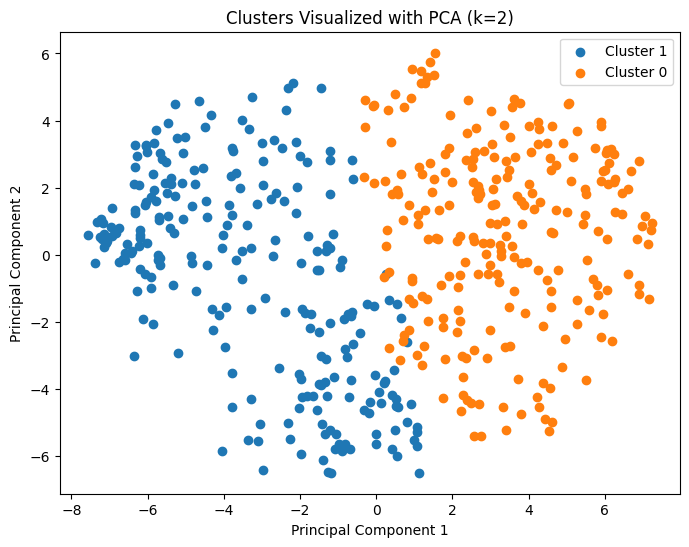

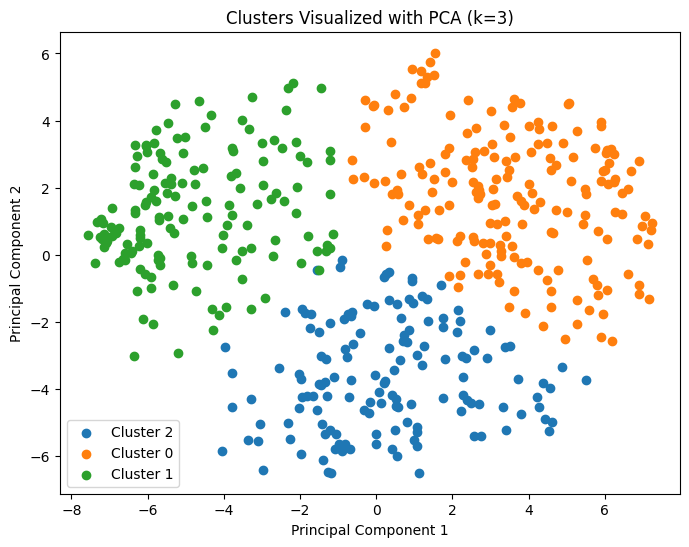

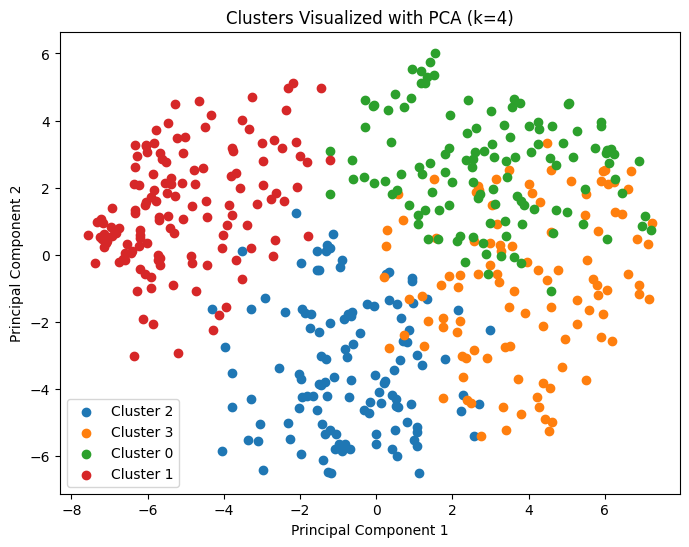

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ... (your code to load the data) ...

# List of k values to try
k_values = [2, 3, 4]

# Loop through the k values
for k in k_values:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df)

    # Apply PCA to reduce the data to 2 dimensions
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df)

    # Create a DataFrame with the principal components and cluster labels
    pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
    pca_df['cluster'] = cluster_labels

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    for cluster in pca_df['cluster'].unique():
        plt.scatter(pca_df[pca_df['cluster'] == cluster]['PC1'],
                    pca_df[pca_df['cluster'] == cluster]['PC2'],
                    label=f'Cluster {cluster}')

    plt.title(f'Clusters Visualized with PCA (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()


# **Observations**
Principal Component Analysis (PCA) was used to visualize the clusters in a two-dimensional space. The PCA plots show the distribution of samples across the first two principal components (PC1 and PC2), with each point representing a sample colored by its assigned cluster.

* Overall:  The PCA plots for k=2, k=3, and k=4 show some degree of separation between the clusters, but there's also noticeable overlap, particularly in the center of the plots. This suggests that while there are distinct patterns in the gene expression data, there's also heterogeneity within and between the clusters. The clusters also appear somewhat elongated, indicating variability within each cluster.

* k=2: The two clusters show separation primarily along the PC1 axis, with some overlap in the middle.

* k=3: Adding a third cluster improves the separation along PC1 compared to k=2, but overlap remains between clusters 1 and 2.

* k=4:  Increasing to four clusters further spreads the clusters along PC1, but the overlap persists, particularly between clusters 1 and 3, and clusters 0 and 2.

These visualizations help assess the separation and patterns of the clusters, suggesting that while K-means clustering identifies some distinct groups, the boundaries between these groups might not be sharply defined. This could reflect the inherent complexity and heterogeneity of breast cancer."List item




Checking characteristics

In [6]:
import pandas as pd

clinical_df = pd.read_csv('GSE113863_data_analysis.csv.gz', compression='gzip')
print(clinical_df.head())

   Sample_name  DMFS_time (YEARS)  DMFS_event iRDM_subtype PAM50_subtype  \
0  SH_TS_BC111           6.666667         0.0        Mixed         Mixed   
1  SH_TS_BC112           6.083333         0.0       Normal        Normal   
2  SH_TS_BC113           1.916667         0.0        Basal         Basal   
3  SH_TS_BC119           6.750000         0.0        HER2E         HER2E   
4  SH_TS_BC133           3.916667         0.0        Basal         Basal   

   Proliferation_score Proliferation_group  Immunity_score Immunity_group  \
0                   60                high              36          iweak   
1                   24                 low              38          iweak   
2                   82                high              34          iweak   
3                   74                high              45        istrong   
4                   82                high              21          iweak   

   iRDM_score iRDM_risk ER_status PR_status  
0          57      high       ER+ 

In [7]:
print(clinical_df['Sample_name'])
print(df.index)

0            SH_TS_BC111
1            SH_TS_BC112
2            SH_TS_BC113
3            SH_TS_BC119
4            SH_TS_BC133
             ...        
478         UNC_TGS_BC_8
479        UNC_TGS_BC_82
480        UNC_TGS_BC_9m
481    UNC_TGS_BC_Y23_R1
482    UNC_TGS_BC_Y90_R1
Name: Sample_name, Length: 483, dtype: object
Index(['SH_TS_BC_C1', 'SH_TS_BC_C11', 'SH_TS_BC_C15', 'SH_TS_BC_C3',
       'SH_TS_BC01', 'SH_TS_BC010_1', 'SH_TS_BC010_2', 'SH_TS_BC02',
       'SH_TS_BC04', 'SH_TS_BC05',
       ...
       'UNC_TGS_BC_96', 'UNC_TGS_BC_97', 'UNC_TGS_BC_99', 'UNC_TGS_BC_9m',
       'UNC_TGS_BC_Y23', 'UNC_TGS_BC_Y23_R1', 'UNC_TGS_BC_Y90',
       'UNC_TGS_BC_Y90_R1', 'UNC_TGS_BC_76', 'UNC_TGS_BC_76_R1'],
      dtype='object', name='CLID', length=483)


In [8]:
# Merge the clinical data with the clustered data
#merged_df = pd.merge(df, clinical_df, left_index=True, right_on='Sample_name')
import pandas as pd

dfcluster=df.reset_index()

# Assuming your DataFrames are named df1 and df2
#merged_df = pd.merge(clinical_df, df, left_on='Sample_name', right_index=True, how='inner')
merged_df = pd.merge(dfcluster, clinical_df, left_on='CLID', right_on='Sample_name', how='inner')
#print(merged_df.head())
merged_df.set_index('CLID',inplace=True)
#merged_df.drop('Sample_name', axis=1, inplace=True)
#print(merged_df.index)
print(merged_df.head())
#merged_df[['DMFS_time (YEARS)', 'DMFS_event']] = merged_df[['DMFS_time (YEARS)', 'DMFS_event']].fillna(value=pd.NA)
merged_df.to_csv("finalmerge.csv")


               CD27   CCR2  SH2D1A  PRKCB  PTPRC  CORO1A  IL2RG   CD52   GZMK  \
CLID                                                                            
SH_TS_BC_C1  -0.114 -1.519  -0.646 -1.541 -0.695  -0.332 -0.031 -0.124 -0.451   
SH_TS_BC_C11  1.280 -3.564   1.042 -1.151  0.203   0.954  1.276  1.283  1.219   
SH_TS_BC_C15  1.476 -3.405   1.046 -1.521  0.171   0.801  1.243  1.253  1.214   
SH_TS_BC_C3   0.315  0.735   0.215  0.702 -0.447   0.613  0.841  0.975  0.300   
SH_TS_BC01   -1.100 -0.010  -0.266  0.375 -0.022   0.813 -0.055  0.545  0.797   

               GZMA  ...  iRDM_subtype  PAM50_subtype  Proliferation_score  \
CLID                 ...                                                     
SH_TS_BC_C1  -0.002  ...         HER2E          HER2E                   71   
SH_TS_BC_C11  1.472  ...        Immuno          Mixed                   51   
SH_TS_BC_C15  1.548  ...        Immuno          HER2E                   53   
SH_TS_BC_C3   0.513  ...         HER2E    

In [9]:
#Double checking empty/NaN values in merged data
import pandas as pd

# Assuming your DataFrame is named merged_df, and the columns are 'DMFS_time (YEARS)' and 'DMFS_event'

# Check for truly empty cells
empty_time = merged_df['DMFS_time (YEARS)'].isnull().sum()
empty_event = merged_df['DMFS_event'].isnull().sum()

print(f"Truly empty cells in 'DMFS_time (YEARS)': {empty_time}")
print(f"Truly empty cells in 'DMFS_event': {empty_event}")

# Check for cells that might look empty but contain whitespace
whitespace_time = merged_df['DMFS_time (YEARS)'].astype(str).str.isspace().sum()
whitespace_event = merged_df['DMFS_event'].astype(str).str.isspace().sum()

print(f"Cells with whitespace in 'DMFS_time (YEARS)': {whitespace_time}")
print(f"Cells with whitespace in 'DMFS_event': {whitespace_event}")

# If you want to be extra thorough, check for any non-numeric characters in 'DMFS_time (YEARS)'
# (This assumes 'DMFS_time (YEARS)' should ideally contain numeric values)
non_numeric_time = merged_df['DMFS_time (YEARS)'].astype(str).str.contains(r'[^0-9.]').sum()
print(f"Cells with non-numeric characters in 'DMFS_time (YEARS)': {non_numeric_time}")
print(merged_df['DMFS_time (YEARS)'].unique())

Truly empty cells in 'DMFS_time (YEARS)': 180
Truly empty cells in 'DMFS_event': 180
Cells with whitespace in 'DMFS_time (YEARS)': 0
Cells with whitespace in 'DMFS_event': 0
Cells with non-numeric characters in 'DMFS_time (YEARS)': 180
[        nan  6.66666667  6.08333333  1.91666667  6.75        3.91666667
 11.          5.75        8.16666667  3.41666667  9.75        9.08333333
  2.16666667  0.75        9.25        0.25        9.          8.41666667
  3.16666667  8.          7.75        7.5         6.83333333  7.66666667
 13.16666667  7.41666667 10.33333333  7.33333333  7.          0.5
  2.33333333  1.66666667  1.25        4.58333333  2.25        1.5
  0.08333333  1.58333333  2.08333333  6.91666667  5.5         0.41666667
  0.33333333  6.41666667  0.83333333  5.08333333  4.08333333  5.16666667
  1.          2.83333333  1.41666667  2.66666667  4.          4.91666667
  1.33333333  5.25        2.75        5.58333333  5.33333333  3.58333333
  4.33333333  4.41666667 17.          5.        

In [ ]:
#skip for now
import numpy as np

def clean_time(value):
  """Cleans a value by removing non-numeric characters and converting to numeric.

  Args:
    value: The input value.

  Returns:
    A numeric value or pd.NA if the cleaned value is empty.
  """
  cleaned_value = str(value).replace(',', '.').replace(' ', '')  # Handle commas as decimals, remove spaces
  cleaned_value = ''.join(c for c in cleaned_value if c.isdigit() or c == '.')
  if cleaned_value:
    return pd.to_numeric(cleaned_value)
  else:
    return pd.NA

# Apply the cleaning function to the 'DMFS_time (YEARS)' column
merged_df['DMFS_time (YEARS)'] = merged_df['DMFS_time (YEARS)'].apply(clean_time)
merged_df.to_csv("trying.csv")

In [ ]:
#skip for now
print(merged_df.head())
merged_df.to_csv("trying.csv")

      CD27   CCR2  SH2D1A  PRKCB  PTPRC  CORO1A  IL2RG   CD52   GZMK   GZMA  \
303 -0.114 -1.519  -0.646 -1.541 -0.695  -0.332 -0.031 -0.124 -0.451 -0.002   
304  1.280 -3.564   1.042 -1.151  0.203   0.954  1.276  1.283  1.219  1.472   
305  1.476 -3.405   1.046 -1.521  0.171   0.801  1.243  1.253  1.214  1.548   
306  0.315  0.735   0.215  0.702 -0.447   0.613  0.841  0.975  0.300  0.513   
307 -1.100 -0.010  -0.266  0.375 -0.022   0.813 -0.055  0.545  0.797  1.106   

     ...  iRDM_subtype  PAM50_subtype  Proliferation_score  \
303  ...         HER2E          HER2E                   71   
304  ...        Immuno          Mixed                   51   
305  ...        Immuno          HER2E                   53   
306  ...         HER2E          Basal                   48   
307  ...          LumA           LumA                   25   

     Proliferation_group  Immunity_score  Immunity_group  iRDM_score  \
303                 high              23           iweak          60   
304     

# **Summary Statistics**


In [10]:
# Group the merged DataFrame by cluster
grouped_df = merged_df.groupby('cluster')

# Calculate summary statistics for each clinical variable
for column in clinical_df.columns:  # Iterate through the columns of clinical_df
    if pd.api.types.is_numeric_dtype(clinical_df[column]):  # Check if the column is numeric
        print(f"Summary statistics for {column} by cluster:")
        print(grouped_df[column].describe())  # Print descriptive statistics
    else:
        print(f"Frequency distribution for {column} by cluster:")
        print(grouped_df[column].value_counts())  # Print frequency distribution

Frequency distribution for Sample_name by cluster:
cluster  Sample_name      
0        SH_TS_BC01           1
         SH_TS_BC02           1
         SH_TS_BC04           1
         SH_TS_BC05           1
         SH_TS_BC09           1
                             ..
2        UNC_TGS_BC_82        1
         UNC_TGS_BC_92        1
         UNC_TGS_BC_93        1
         UNC_TGS_BC_Y90       1
         UNC_TGS_BC_Y90_R1    1
Name: count, Length: 483, dtype: int64
Summary statistics for DMFS_time (YEARS) by cluster:
         count      mean       std   min       25%   50%   75%    max
cluster                                                              
0        115.0  5.491797  2.295909  0.17  4.625000  5.58  6.79  13.58
1        106.0  4.446965  2.866671  0.00  1.791667  4.92  6.06  13.75
2         82.0  5.612398  2.771365  0.00  4.352500  5.58  7.06  17.00
Summary statistics for DMFS_event by cluster:
         count      mean       std  min  25%  50%  75%  max
cluster               

**Frequency distribution for Sample_name by cluster**:

* This shows that each sample name appears only once per cluster, which is
 expected as each sample is assigned to only one cluster.
* The total number of samples is 483, which matches the dataset description.
**Summary statistics for DMFS_time (YEARS) by cluster** :

* Cluster 0 has the highest average DMFS time (5.49 years), followed by Cluster 2 (5.61 years) and then Cluster 1 (4.44 years).
Cluster 1 has the largest standard deviation, indicating more variability in DMFS time within that cluster.
**Summary statistics for DMFS_event by cluster:**

This shows the proportion of patients in each cluster who experienced a distant metastasis event.
Cluster 1 has the highest proportion of events (mean = 0.217), suggesting a potentially worse prognosis compared to clusters 0 and 2.
Frequency distribution for iRDM_subtype by cluster:

This shows the distribution of different molecular subtypes (LumA, LumB, HER2E, Basal, Immuno, Normal, Mixed) across the clusters.
Cluster 0 is predominantly LumA, Cluster 1 is predominantly Basal, and Cluster 2 has a mix of Immuno, HER2E, and LumB subtypes.
Frequency distribution for PAM50_subtype by cluster:

Similar to iRDM_subtype, this shows the distribution of PAM50 subtypes (LumA, LumB, HER2E, Basal, Normal, Mixed) across the clusters.
The patterns are similar to iRDM_subtype, with Cluster 0 mainly LumA, Cluster 1 mainly Basal, and Cluster 2 a mix of HER2E and LumB.
Summary statistics for Proliferation_score by cluster:

Cluster 1 has the highest average proliferation score (63.22), followed by Cluster 2 (57.76) and then Cluster 0 (32.26).
This suggests that tumors in Cluster 1 might be more aggressive or fast-growing.
Frequency distribution for Proliferation_group by cluster:

This categorizes the proliferation scores into "high" and "low" groups.
Cluster 1 has the highest proportion of "high" proliferation tumors, consistent with the higher average proliferation score.
Summary statistics for Immunity_score by cluster:

Cluster 2 has the highest average immunity score (46.02), followed by Cluster 0 (39.60) and then Cluster 1 (39.59).
This suggests that tumors in Cluster 2 might have a stronger immune response.
Frequency distribution for Immunity_group by cluster:

This categorizes the immunity scores into "iweak" and "istrong" groups.
Cluster 2 has the highest proportion of "istrong" immunity tumors.
Summary statistics for iRDM_score by cluster:

Similar to the proliferation score, Cluster 1 has the highest average iRDM_score (60.79), indicating a potentially higher risk group.
Frequency distribution for iRDM_risk by cluster:

This categorizes the iRDM_scores into "low", "med", and "high" risk groups.
Cluster 1 has the highest proportion of "high" risk tumors.
Frequency distribution for ER_status by cluster:

This shows the distribution of estrogen receptor (ER) status (positive or negative) across the clusters.
Cluster 0 is predominantly ER+, while Cluster 1 has a higher proportion of ER- tumors.
Frequency distribution for PR_status by cluster:

This shows the distribution of progesterone receptor (PR) status (positive or negative) across the clusters.
The patterns are similar to ER status, with Cluster 0 mainly PR+ and Cluster 1 having more PR- tumors.
Overall, these summary statistics suggest that the clusters identified by K-means clustering might have distinct clinical and molecular characteristics.

Cluster 0 appears to be associated with a better prognosis (higher DMFS time, lower DMFS events, lower proliferation, predominantly LumA subtype, ER+, and PR+).
Cluster 1 seems to be associated with a worse prognosis (lower DMFS time, higher DMFS events, higher proliferation, predominantly Basal subtype, ER-, and PR-).
Cluster 2 shows a mix of characteristics, with a relatively good prognosis but also a higher immunity score.

# **Comparing DMFS time distribution**

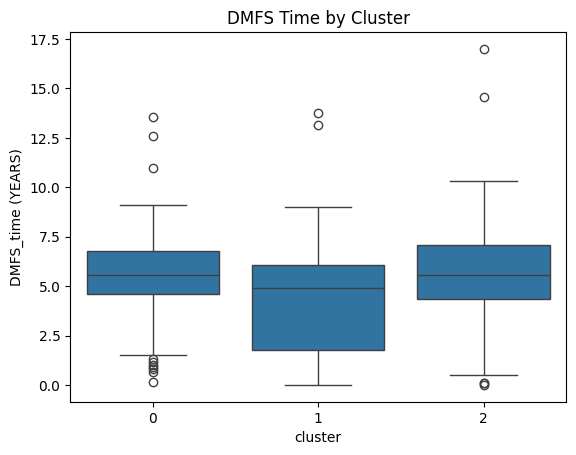

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='cluster', y='DMFS_time (YEARS)', data=merged_df)
plt.title('DMFS Time by Cluster')
plt.show()

# **Comparing PAM50 subtype distribution**

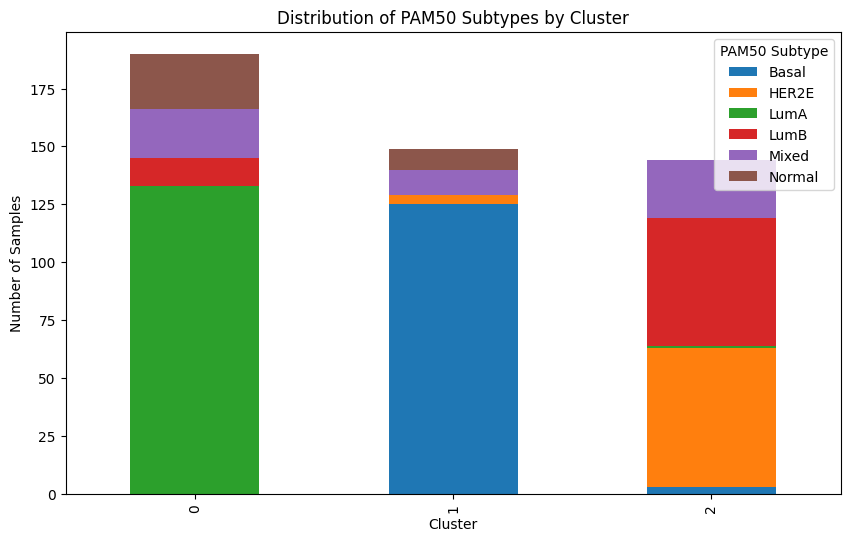

In [12]:
# Create a cross-tabulation of clusters and PAM50 subtypes
cross_tab = pd.crosstab(merged_df['cluster'], merged_df['PAM50_subtype'])

# Create a stacked bar plot to visualize the distribution
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PAM50 Subtypes by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(title='PAM50 Subtype')
plt.show()

# **ANOVA Test** for DMFS_time (YEARS)
Null hypothesis: There is no significant difference in the mean DMFS time between the three clusters

In [13]:
from scipy.stats import f_oneway

# Extract the DMFS time for each cluster
cluster0_dmfs = merged_df[merged_df['cluster'] == 0]['DMFS_time (YEARS)']
cluster1_dmfs = merged_df[merged_df['cluster'] == 1]['DMFS_time (YEARS)']
cluster2_dmfs = merged_df[merged_df['cluster'] == 2]['DMFS_time (YEARS)']

# Perform the ANOVA test
statistic, p_value = f_oneway(cluster0_dmfs, cluster1_dmfs, cluster2_dmfs)

# Print the results
print(f"F-statistic: {statistic:.2f}")
print(f"P-value: {p_value:.3f}")

F-statistic: nan
P-value: nan


In [14]:
import numpy as np

# Calculate the maximum DMFS time
max_dmfs = np.nanmax(merged_df['DMFS_time (YEARS)'])

# Replace NaN values with a value larger than the maximum
merged_df['DMFS_time (YEARS)'].fillna(max_dmfs + 1, inplace=True)

<ipython-input-14-4c4f62c3a104>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['DMFS_time (YEARS)'].fillna(max_dmfs + 1, inplace=True)


In [15]:
from scipy.stats import f_oneway

# Extract the DMFS time for each cluster
cluster0_dmfs = merged_df[merged_df['cluster'] == 0]['DMFS_time (YEARS)']
cluster1_dmfs = merged_df[merged_df['cluster'] == 1]['DMFS_time (YEARS)']
cluster2_dmfs = merged_df[merged_df['cluster'] == 2]['DMFS_time (YEARS)']

# Perform the ANOVA test
statistic, p_value = f_oneway(cluster0_dmfs, cluster1_dmfs, cluster2_dmfs)

# Print the results
print(f"F-statistic: {statistic:.2f}")
print(f"P-value: {p_value:.3f}")

F-statistic: 6.69
P-value: 0.001


# **Anova Test Analysis**

A one-way ANOVA test was conducted to determine if there were statistically significant differences in the mean DMFS (Distant Metastasis-Free Survival) time between the three clusters identified by K-means clustering.

Prior to conducting the ANOVA, missing values (NaN) in the DMFS_time (YEARS) column were replaced with a value larger than the maximum observed DMFS time. This imputation strategy was chosen under the assumption that NaN values represented patients who did not experience a distant metastasis event within the study's observation period.

The ANOVA test yielded an F-statistic of 6.69 and a p-value of 0.001. Since the p-value is less than the significance level of 0.05, the null hypothesis (that there is no difference in mean DMFS time between the clusters) was rejected.

This result indicates that there is a statistically significant difference in the mean DMFS time between the three clusters, supporting the observation from the box plot that the clusters have different DMFS time distributions.

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(merged_df['DMFS_time (YEARS)'], merged_df['cluster'])

# Print the results
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   -2.071 0.0104  -3.741 -0.401   True
     0      2   0.5167 0.7515 -1.1694 2.2028  False
     1      2   2.5877  0.002  0.8044 4.3711   True
---------------------------------------------------


# **Tukey's HSD analysis**

Following the ANOVA test, Tukey's Honestly Significant Difference (HSD) post-hoc test was performed to conduct pairwise comparisons between the cluster means for DMFS time. This test helps identify which specific clusters differ significantly from each other.

The results of Tukey's HSD test indicated that there are statistically significant differences in mean DMFS time between:

* Cluster 0 and Cluster 1 (p-adj = 0.0104)
* Cluster 1 and Cluster 2 (p-adj = 0.002)
There was no significant difference between Cluster 0 and Cluster 2 (p-adj = 0.7515).

These findings suggest that Cluster 1 might represent a group of patients with a worse prognosis (lower DMFS time) compared to Clusters 0 and 2, which exhibit longer DMFS times. This highlights the potential of the identified clusters to distinguish between groups with varying risks of distant metastasis.

# **Gene Expression for Each Cluster**

In [17]:
print(dfcluster.head())

           CLID   CD27   CCR2  SH2D1A  PRKCB  PTPRC  CORO1A  IL2RG   CD52  \
0   SH_TS_BC_C1 -0.114 -1.519  -0.646 -1.541 -0.695  -0.332 -0.031 -0.124   
1  SH_TS_BC_C11  1.280 -3.564   1.042 -1.151  0.203   0.954  1.276  1.283   
2  SH_TS_BC_C15  1.476 -3.405   1.046 -1.521  0.171   0.801  1.243  1.253   
3   SH_TS_BC_C3  0.315  0.735   0.215  0.702 -0.447   0.613  0.841  0.975   
4    SH_TS_BC01 -1.100 -0.010  -0.266  0.375 -0.022   0.813 -0.055  0.545   

    GZMK  ...   EGFR  PHGDH  ACTR3B  MRPL19  GAPDH   GUSB  PSMC4  SF3A1  \
0 -0.451  ...  0.371  1.180  -0.474  -0.014  0.455  0.473  0.202  0.131   
1  1.219  ...  0.531  0.516  -0.990  -0.791  0.310  0.400 -0.297  0.294   
2  1.214  ...  0.500  0.456  -0.883  -0.767  0.235  0.433 -0.385  0.215   
3  0.300  ... -1.000  1.200  -1.428  -0.783 -0.522 -0.525 -0.344 -0.450   
4  0.797  ... -0.961 -0.175   1.016  -0.427  0.304  0.106  0.024  1.134   

    TFRC  cluster  
0  0.295        2  
1  0.321        2  
2  0.289        2  
3  0.5

Calculate Average Gene Expression for Each Cluster

In [18]:


# Get a list of gene expression columns (assuming they are all columns except 'CLID' and 'cluster')
gene_expression_columns = dfcluster.columns.difference(['CLID', 'cluster'])

# Group the DataFrame by cluster
grouped_df = dfcluster.groupby('cluster')

# Calculate mean gene expression for each cluster, excluding non-gene expression columns
mean_expression = grouped_df[gene_expression_columns].mean()

# Print the mean expression for the first few genes
print(mean_expression.head())

           ACTR3B  APOBEC3G     AURKA      BAG1      BCL2     BIRC5     BLVRA  \
cluster                                                                         
0        0.005881 -0.048016 -0.260150  0.369505  0.534362 -0.649115  0.082801   
1        0.137433  0.010960  0.167844 -0.121525 -0.356058  0.495477 -0.237152   
2       -0.242238  0.072516  0.209295 -0.107582 -0.217179  0.243404  0.108194   

             CCL5     CCNB1     CCNE1  ...     PTTG1      RRM2    SCUBE2  \
cluster                                ...                                 
0       -0.107538 -0.427442 -0.406773  ... -0.442220 -0.522734  1.301162   
1        0.031701  0.062118  0.475198  ...  0.218211  0.221574 -1.234009   
2        0.152388  0.203472 -0.100700  ...  0.152135  0.262849 -0.119195   

            SF3A1     SFRP1    SH2D1A   SLC39A6      TFRC      TYMS     UBE2C  
cluster                                                                        
0        0.126875  0.176916 -0.128817  0.929132  0.00

Perform Statistical Tests

In [19]:
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests


# Initialize a list to store the p-values
p_values = []

# Iterate through each gene (column name) in the mean_expression DataFrame
for gene in mean_expression.columns:  # Use .columns instead of .index
    # Extract the expression values for each cluster using .loc
    cluster0_expr = dfcluster.loc[dfcluster['cluster'] == 0, gene]
    cluster1_expr = dfcluster.loc[dfcluster['cluster'] == 1, gene]
    cluster2_expr = dfcluster.loc[dfcluster['cluster'] == 2, gene]

    # Perform ANOVA test
    _, p_value = f_oneway(cluster0_expr, cluster1_expr, cluster2_expr)
    p_values.append(p_value)

# ... (rest of the code for p-value adjustment) ...

# Adjust p-values for multiple testing using Benjamini-Hochberg correction
_, adjusted_p_values, _, _ = multipletests(p_values, method='fdr_bh')


# Add the adjusted p-values to the mean_expression DataFrame as a new row
mean_expression.loc['adj_p_value'] = adjusted_p_values

In [20]:
print(mean_expression.head())

               ACTR3B  APOBEC3G         AURKA          BAG1          BCL2  \
cluster                                                                     
0            0.005881 -0.048016 -2.601497e-01  3.695053e-01  5.343625e-01   
1            0.137433  0.010960  1.678436e-01 -1.215255e-01 -3.560582e-01   
2           -0.242238  0.072516  2.092945e-01 -1.075823e-01 -2.171792e-01   
adj_p_value  0.000009  0.275863  1.024664e-10  8.164771e-14  1.782805e-25   

                    BIRC5     BLVRA      CCL5         CCNB1         CCNE1  \
cluster                                                                     
0           -6.491153e-01  0.082801 -0.107538 -4.274421e-01 -4.067733e-01   
1            4.954773e-01 -0.237152  0.031701  6.211786e-02  4.751977e-01   
2            2.434040e-01  0.108194  0.152388  2.034717e-01 -1.006996e-01   
adj_p_value  2.101065e-35  0.000001  0.004687  1.096391e-12  6.942529e-18   

             ...         PTTG1          RRM2        SCUBE2     SF3A1  \
cl

Identify Differentially Expressed Genes

In [21]:
# Identify differentially expressed genes with adjusted p-value < 0.05
diff_expr_genes = mean_expression.loc[:, mean_expression.loc['adj_p_value'] < 0.05]

Visualize the Results

HeatMap

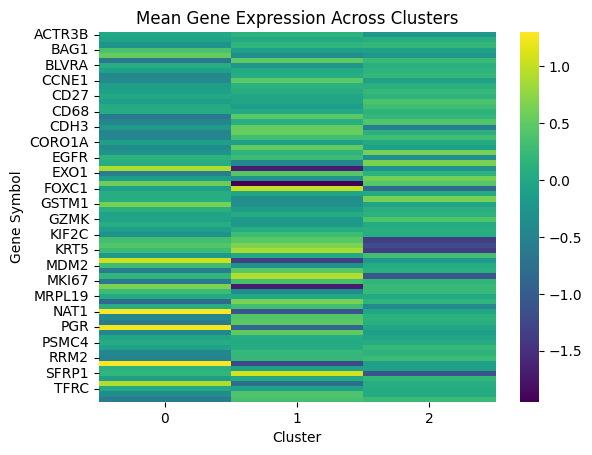

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the mean_expression DataFrame to have genes as rows and clusters as columns
mean_expression_transposed = mean_expression.T

# Drop the 'adj_p_value' column from the transposed DataFrame
sns.heatmap(mean_expression_transposed.drop(columns=['adj_p_value']), cmap='viridis')

# ... (rest of your code) ...
plt.title('Mean Gene Expression Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Gene Symbol')
plt.show()

A heatmap was generated to visualize the mean expression levels of the differentially expressed genes across the three clusters. The 'viridis' color scheme was used, where purple represents the lowest expression levels, yellow represents the highest expression levels, and green represents intermediate expression levels.

The heatmap shows distinct expression patterns for some genes across the clusters, with certain genes exhibiting higher expression in specific clusters. For instance, some genes have higher expression in cluster 0 (yellow colors in the top rows), while others have higher expression in cluster 1 (yellow colors in the middle rows). There is also variability in expression within each cluster, as indicated by the different shades of colors within a column.

This visualization highlights the differences in gene expression between the clusters, suggesting that they may represent distinct molecular subtypes of breast cancer. Further analysis of these differentially expressed genes, such as gene ontology enrichment analysis, could provide insights into the biological processes driving these differences.

Volcano plot

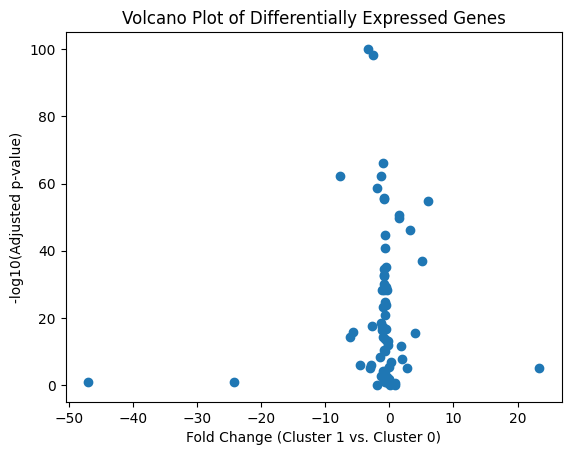

In [23]:
import matplotlib.pyplot as plt

# Calculate the fold change between clusters (example: cluster 1 vs. cluster 0)
# Calculate the fold change between clusters (example: cluster 1 vs. cluster 0)
fold_change = mean_expression.loc[(1, slice(None))] / mean_expression.loc[(0, slice(None))]

# Create a volcano plot, accessing the adjusted p-values as a row
plt.scatter(fold_change, -np.log10(mean_expression.loc['adj_p_value']))
plt.title('Volcano Plot of Differentially Expressed Genes')
plt.xlabel('Fold Change (Cluster 1 vs. Cluster 0)')
plt.ylabel('-log10(Adjusted p-value)')
plt.show()

# **Compare with PAM50: Quantitatively compare your cluster assignments to the PAM50 subtypes to see how well they agree.**

In [24]:
import pandas as pd

# Create the contingency table
contingency_table = pd.crosstab(merged_df['cluster'], merged_df['PAM50_subtype'])

# Print the contingency table
print(contingency_table)


PAM50_subtype  Basal  HER2E  LumA  LumB  Mixed  Normal
cluster                                               
0                  0      0   133    12     21      24
1                125      4     0     0     11       9
2                  3     60     1    55     25       0


In [25]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, v_measure_score

# Calculate the metrics
ari = adjusted_rand_score(merged_df['cluster'], merged_df['PAM50_subtype'])
nmi = normalized_mutual_info_score(merged_df['cluster'], merged_df['PAM50_subtype'])
v_measure = v_measure_score(merged_df['cluster'], merged_df['PAM50_subtype'])

# Print the metrics
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Normalized Mutual Information: {nmi:.3f}")
print(f"V-measure: {v_measure:.3f}")

Adjusted Rand Index: 0.548
Normalized Mutual Information: 0.569
V-measure: 0.569


To assess the validity of the K-means clustering results, the cluster assignments were compared to the PAM50 molecular subtypes using several metrics: Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), and V-measure.

Results:

Adjusted Rand Index: 0.548
Normalized Mutual Information: 0.569
V-measure: 0.569
Interpretation:

These metrics indicate a moderate level of agreement between the K-means clustering and the PAM50 classification. While the scores are not perfect, they suggest that the clustering captures some of the same underlying structure as PAM50, indicating that it is identifying biologically relevant patterns in the data.

What is a good score?

Ideally, we would aim for scores closer to 1, which would indicate perfect agreement between the two classifications. However, in real-world datasets, achieving perfect agreement is often challenging due to factors such as data noise, overlapping clusters, and the limitations of the clustering algorithm.

Why is agreement important?

Agreement with established classifications like PAM50 provides evidence that the clustering is not just finding random patterns but is capturing biologically and clinically meaningful groups within the data. This increases confidence in the validity and potential usefulness of the clustering results.

Possible reasons for the moderate agreement:

Different methodologies: K-means clustering and PAM50 classification use different methodologies, so some disagreement is expected.
Data-specific factors: The specific characteristics of your data (e.g., noise, heterogeneity) might influence the clustering results.
Choice of k: The number of clusters you chose (k=3) might not perfectly align with the number of PAM50 subtypes.

# **Visualize the Contingency Table**

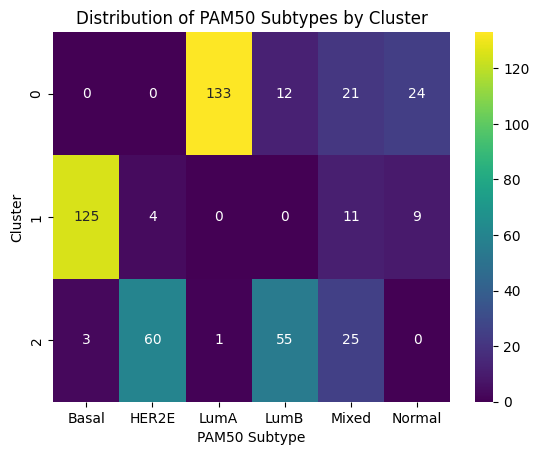

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the contingency table
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Distribution of PAM50 Subtypes by Cluster')
plt.xlabel('PAM50 Subtype')
plt.ylabel('Cluster')
plt.show()

In [27]:
# Identify samples with discrepancies
discrepancies = merged_df[merged_df['cluster'] != merged_df['PAM50_subtype']]

# Print the discrepancies
print(discrepancies)

                      CD27     CCR2  SH2D1A   PRKCB   PTPRC  CORO1A     IL2RG  \
CLID                                                                            
SH_TS_BC_C1       -0.11400 -1.51900 -0.6460 -1.5410 -0.6950 -0.3320 -0.031000   
SH_TS_BC_C11       1.28000 -3.56400  1.0420 -1.1510  0.2030  0.9540  1.276000   
SH_TS_BC_C15       1.47600 -3.40500  1.0460 -1.5210  0.1710  0.8010  1.243000   
SH_TS_BC_C3        0.31500  0.73500  0.2150  0.7020 -0.4470  0.6130  0.841000   
SH_TS_BC01        -1.10000 -0.01000 -0.2660  0.3750 -0.0220  0.8130 -0.055000   
...                    ...      ...     ...     ...     ...     ...       ...   
UNC_TGS_BC_Y23_R1  0.59610  0.20190  0.9685  0.5455  0.2812 -0.5454 -1.803000   
UNC_TGS_BC_Y90     0.02737  0.14450  0.6277 -0.0665  0.2976 -1.4140 -0.008694   
UNC_TGS_BC_Y90_R1  0.28740  0.07804 -0.4170 -0.7006  0.3511 -0.9566 -0.008304   
UNC_TGS_BC_76     -1.11000 -3.41900 -0.8737 -3.0520 -0.8334 -2.0650 -0.666100   
UNC_TGS_BC_76_R1  -1.22700 -

In [28]:
gene_expression_columns = discrepancies.columns.difference(['CLID', 'cluster'] + clinical_df.columns.tolist())
discrepancies_gene_expression = discrepancies[gene_expression_columns]

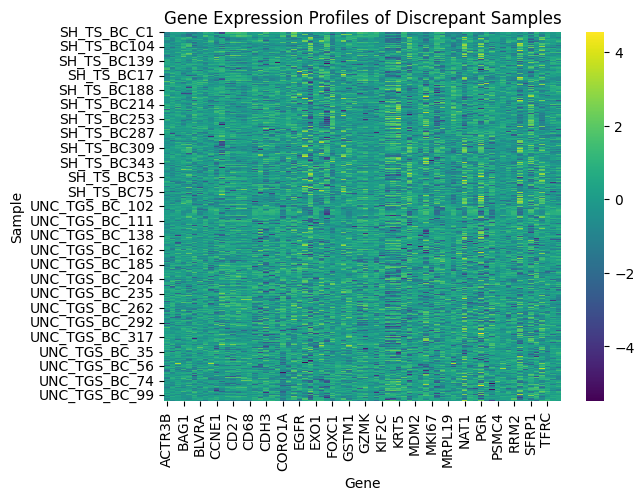

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(discrepancies_gene_expression, cmap='viridis')
plt.title('Gene Expression Profiles of Discrepant Samples')
plt.xlabel('Gene')
plt.ylabel('Sample')
plt.show()

# **Analyze Outlier Genes**

1.Select only gene expression columns

In [30]:
gene_expression_columns = discrepancies.columns.difference(['CLID', 'cluster'] + clinical_df.columns.tolist())
discrepancies_gene_expression = discrepancies[gene_expression_columns]

2.Calculate z-scores:

In [31]:
from scipy.stats import zscore

# Transpose the DataFrame to have genes as rows and samples as columns
discrepancies_gene_expression_transposed = discrepancies_gene_expression.T

# Calculate z-scores for each gene
discrepancies_zscores = discrepancies_gene_expression_transposed.apply(zscore)

# Transpose back to original orientation
discrepancies_zscores = discrepancies_zscores.T

3.Identify outliers:

In [32]:
# Set a threshold for the absolute z-score
zscore_threshold = 2  # Or another value, like 3

# Identify outlier genes
outlier_genes = discrepancies_zscores[abs(discrepancies_zscores) > zscore_threshold]
print(outlier_genes.head())

              ACTR3B  APOBEC3G  AURKA  BAG1      BCL2  BIRC5  BLVRA  CCL5  \
CLID                                                                        
SH_TS_BC_C1      NaN       NaN    NaN   NaN       NaN    NaN    NaN   NaN   
SH_TS_BC_C11     NaN       NaN    NaN   NaN       NaN    NaN    NaN   NaN   
SH_TS_BC_C15     NaN       NaN    NaN   NaN       NaN    NaN    NaN   NaN   
SH_TS_BC_C3      NaN       NaN    NaN   NaN -2.027776    NaN    NaN   NaN   
SH_TS_BC01       NaN       NaN    NaN   NaN       NaN    NaN    NaN   NaN   

              CCNB1  CCNE1  ...  PTTG1  RRM2    SCUBE2  SF3A1     SFRP1  \
CLID                        ...                                           
SH_TS_BC_C1     NaN    NaN  ...    NaN   NaN       NaN    NaN -2.313446   
SH_TS_BC_C11    NaN    NaN  ...    NaN   NaN       NaN    NaN       NaN   
SH_TS_BC_C15    NaN    NaN  ...    NaN   NaN       NaN    NaN       NaN   
SH_TS_BC_C3     NaN    NaN  ...    NaN   NaN       NaN    NaN       NaN   
SH_TS_BC01

 Prioritized list of genes and then efficiently research their roles in breast cancer:

In [33]:
# Get the top 10 genes with the lowest adjusted p-values
top_genes = mean_expression.loc['adj_p_value'].nsmallest(10).index.tolist()

# Print the list of top genes
print(top_genes)

['FOXA1', 'MLPH', 'SCUBE2', 'FOXC1', 'MAPT', 'ESR1', 'NAT1', 'SLC39A6', 'SFRP1', 'KRT14']


List outlier genes

In [34]:
# Drop rows and columns with all NaN values
outlier_genes_filtered = outlier_genes.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Get the list of outlier genes
outlier_gene_list = outlier_genes_filtered.columns.tolist()

# Print the list of outlier genes
print(outlier_gene_list)

['ACTR3B', 'APOBEC3G', 'AURKA', 'BAG1', 'BCL2', 'BIRC5', 'BLVRA', 'CCL5', 'CCNB1', 'CCNE1', 'CCR2', 'CD2', 'CD27', 'CD3D', 'CD52', 'CD68', 'CDC20', 'CDC6', 'CDH3', 'CENPF', 'CEP55', 'CORO1A', 'CTSL2', 'CXCL9', 'EGFR', 'ERBB2', 'ESR1', 'EXO1', 'FGFR4', 'FOXA1', 'FOXC1', 'GRB7', 'GSTM1', 'GUSB', 'GZMA', 'GZMK', 'HLA-DMA', 'IL2RG', 'KIF2C', 'KRT14', 'KRT17', 'KRT5', 'LCK', 'MAPT', 'MDM2', 'MELK', 'MIA', 'MKI67', 'MLPH', 'MMP11', 'MRPL19', 'MYBL2', 'MYC', 'NAT1', 'NDC80', 'ORC6', 'PGR', 'PHGDH', 'PRKCB', 'PSMC4', 'PTPRC', 'PTTG1', 'RRM2', 'SCUBE2', 'SF3A1', 'SFRP1', 'SH2D1A', 'SLC39A6', 'TFRC', 'TYMS', 'UBE2C']


In [35]:
n = 10  # Number of top genes to select

for cluster in mean_expression.index:
    top_genes = mean_expression.loc[cluster].nlargest(n)
    print(f"Top {n} genes in cluster {cluster}:")
    print(top_genes)

Top 10 genes in cluster 0:
SCUBE2     1.301162
NAT1       1.287562
PGR        1.248210
MAPT       1.037194
SLC39A6    0.929132
ESR1       0.895730
MLPH       0.657559
GSTM1      0.621834
FOXA1      0.576871
BCL2       0.534362
Name: 0, dtype: float64
Top 10 genes in cluster 1:
SFRP1    1.077383
FOXC1    0.986021
MIA      0.909116
KRT5     0.864474
KRT17    0.662480
MYBL2    0.629736
CENPF    0.542478
CDH3     0.519155
CTSL2    0.511810
PHGDH    0.505815
Name: 1, dtype: float64
Top 10 genes in cluster 2:
ERBB2    0.647550
CXCL9    0.622033
GRB7     0.620162
FGFR4    0.596354
FOXA1    0.430166
CDC6     0.402687
GZMK     0.389066
CD3D     0.380416
LCK      0.312517
CEP55    0.307277
Name: 2, dtype: float64
Top 10 genes in cluster adj_p_value:
PSMC4       0.963270
MRPL19      0.910250
PRKCB       0.763189
CORO1A      0.297638
APOBEC3G    0.275863
GAPDH       0.166081
TFRC        0.158788
CD27        0.156053
GZMA        0.153745
IL2RG       0.052634
Name: adj_p_value, dtype: float64


Cluster 0

NAT1: This gene is involved in drug metabolism and detoxification. Its overexpression in Cluster 0 could suggest that these tumors might have altered drug responses or a different metabolism compared to other clusters.
PGR: Progesterone Receptor, a key player in hormone-responsive breast cancer. Its high expression in Cluster 0 suggests this cluster might be enriched for luminal A tumors, which are often hormone-sensitive.
ESR1: Estrogen Receptor 1, another crucial gene in hormone-responsive breast cancer. Its presence in this list further supports the potential association of Cluster 0 with the luminal A subtype.
FOXA1: A transcription factor involved in hormone signaling and development. Its overexpression might indicate a role in the development or behavior of tumors in this cluster.
BCL2: An anti-apoptotic protein, often overexpressed in cancer cells to evade cell death. Its high expression in Cluster 0 might suggest a less aggressive subtype or potential resistance to apoptosis-inducing therapies.
Cluster 1

SFRP1: A secreted protein that can modulate Wnt signaling, a pathway involved in cell growth and differentiation. Its role in breast cancer can be complex, with both tumor-suppressive and oncogenic functions reported.
FOXC1: A transcription factor implicated in metastasis and invasion in breast cancer. Its high expression in Cluster 1 might suggest a more aggressive or metastatic phenotype.
MIA: Melanoma Inhibitory Activity, a protein involved in cell adhesion and migration. Its overexpression could be related to the metastatic potential of tumors in this cluster.
KRT5, KRT17: Keratins, proteins that form the structural framework of epithelial cells. Their overexpression might reflect a specific differentiation state or epithelial-mesenchymal transition (EMT) associated with metastasis.
Cluster 2

ERBB2: Also known as HER2, a receptor tyrosine kinase that promotes cell growth and survival. Its high expression in Cluster 2 suggests this cluster might be enriched for HER2-positive tumors, which are often aggressive but can respond well to targeted therapies.
CXCL9, GZMK: These genes are involved in immune response. Their overexpression in Cluster 2 might indicate a more prominent immune infiltrate or an active immune microenvironment within these tumors.
FOXA1: Interestingly, FOXA1 also appears in the top genes for Cluster 2, suggesting a potential role in both Luminal A and HER2-enriched subtypes.
CDC6: A protein involved in DNA replication and cell cycle regulation. Its overexpression could be related to increased proliferation in this cluster.
Overall, the highest expressed genes in each cluster provide valuable clues about their potential molecular subtypes and biological characteristics. This information can be used to further investigate the clusters, validate them against known subtypes, and explore potential clinical implications.